# Metrics + Intro to training and evaluation

## Metrics in classification

The most common metrics for classification problems are:

- Accuracy: the proportion of correct predictions
- Precision: the proportion of true positive predictions among all positive predictions (popular: the ability to precisely identify instances of a class)
- Recall: the proportion of true positive predictions among all actual positive instances (popular: the ability to find all instances of a class)
- F1 score: the harmonic mean of precision and recall (popular: the best of both worlds)
- Macro and micro are terms used to specify how to calculate precision and recall for multiclass classification problems. Macro precision is the average of precision for each class, while micro precision is the proportion of true positive predictions among all positive predictions, regardless of class.
- Balanced accuracy is the same as macro average recall
- Confusion matrix: a table showing the number of true positive, true negative, false positive, and false negative predictions
- Classification report: a summary of precision, recall, F1 score, and support for each class

Metrics in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html

### Concepts

| **Term**               | **Description**                                                                                       |
|------------------------|-------------------------------------------------------------------------------------------------------|
| **True Positive (TP)** | The model correctly predicted the positive class. Example: The model predicted "yes" and the actual label was also "yes".   |
| **False Positive (FP)** | The model incorrectly predicted the positive class. Example: The model predicted "yes" but the actual label was "no". This is also called a **Type I error**.   |
| **True Negative (TN)** | The model correctly predicted the negative class. Example: The model predicted "no" and the actual label was also "no".     |
| **False Negative (FN)** | The model incorrectly predicted the negative class. Example: The model predicted "no" but the actual label was "yes". This is also called a **Type II error**.    |


### Confusion matrix

Binary classification:

The scikit-learn convention and more normal in classic statistics is to have TN in the top left corner.

|                          | **Predicted Negative** | **Predicted Positive** |
|--------------------------|------------------------|------------------------|
| **Actual Negative**      | True Negative (TN)     | False Positive (FP)    |
| **Actual Positive**      | False Negative (FN)    | True Positive (TP)     |

If you focus on the True Positive you will quite often see the confusion matrix written as:

|                   | **Predicted Positive** | **Predicted Negative** |
|-------------------|------------------------|------------------------|
| **Actual Positive**   | True Positive (TP)      | False Negative (FN)     |
| **Actual Negative**   | False Positive (FP)     | True Negative (TN)      |


Here we have presented the confusion matrix with actual (true) values in rows and predicted values in columns. This is the most common way of presenting the confusion matrix in machine learning. However, quite often you will see the predicted values presented in the rows and the actual values in the columns.


Multiclass:

In multiclass it is standard to have the TP for each class in the diagonal.

|                  | Predicted Class 0 | Predicted Class 1 | Predicted Class 2 |
|------------------|-------------------|-------------------|-------------------|
| **Actual Class 0** | TP (Class 0)       | FN (Class 0 as Class 1) | FN (Class 0 as Class 2) |
| **Actual Class 1** | FP (Class 1 as Class 0) | TP (Class 1)       | FN (Class 1 as Class 2) |
| **Actual Class 2** | FP (Class 2 as Class 0) | FP (Class 2 as Class 1) | TP (Class 2)       |


**Important**: Be aware of the different ways of presenting the confusion matrix.

### Precision
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

### Recall
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### F1 Score
$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### Accuracy
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

## Example 1 - a binary classification of breast cancer

The goal is to detect breast cancer (malignant or benign) based on features such as the mean radius, mean texture, and mean perimeter of the cell nuclei. The dataset is available in scikit-learn. The negative class (0) is malignant.

Load and split data

In [77]:
# Step 1: Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [78]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 63, 108]))

In [55]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Train a model

In [79]:
# Step 4: Train the Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = clf.predict(X_test)

Evaluate

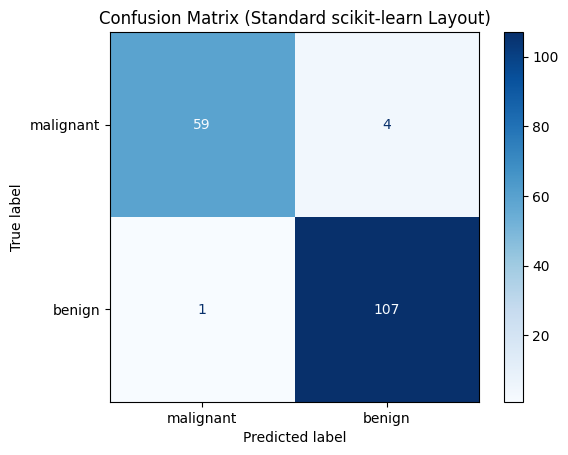

Confusion Matrix (standard layout in scikit-learn):
           Malignant  Benign
Malignant         59       4
Benign             1     107


In [88]:

# Step 6: Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualise the confusion matrix in the standard scikit-learn way
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=cancer.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Standard scikit-learn Layout)")
plt.show()

print("Confusion Matrix (standard layout in scikit-learn):")
print(pd.DataFrame(conf_matrix, columns=['Malignant', 'Benign'], index=['Malignant', 'Benign']))


In [82]:

# Step 7: Calculate and display accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407


Recap - Binary confusion matrix in Scikit-learn


|                          | **Predicted Negative** | **Predicted Positive** |
|--------------------------|------------------------|------------------------|
| **Actual Negative**      | True Negative (TN)     | False Positive (FP)    |
| **Actual Positive**      | False Negative (FN)    | True Positive (TP)     |

In [83]:
#Accuracy: TP + TN / (TP + TN + FP + FN)
(107 + 59)/(107 + 59 + 4 + 1)

0.9707602339181286

In [84]:
# Precision: TP / (TP + FP)
107/(107 + 4)

0.963963963963964

In [85]:
# Recall: TP / (TP + FN)
107/(107 + 1)

0.9907407407407407

## Example 2 - classifying iris flowers

Load the data

In [95]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd

# Step 2: Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [93]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [91]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [94]:
X.shape

(150, 4)

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Train the model

In [96]:
# Step 4: Train the Random Forest model
# clf = RandomForestClassifier(random_state=42)
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = clf.predict(X_test)

Calculate metrics

In [97]:

# Step 6: Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, columns=iris.target_names, index=iris.target_names))

Confusion Matrix:
            setosa  versicolor  virginica
setosa          19           0          0
versicolor       0          13          0
virginica        0           0         13


In [98]:

# Step 7: Calculate and display accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
